In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# copying data file path 
file_path = "/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/PicoGreen_Plots/20240119_PicoGreen_DIPLibrary_Water-PBS.xlsx" 
sheet_name = "water-python"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)


In [3]:
# saving variables from excel sheet for plotting
polyplex = df['polyplex']
avg = df['hemolysis avg']
stdev = df['stddev']
NP_ratio = df['N/P ratio']

KeyError: 'polyplex'

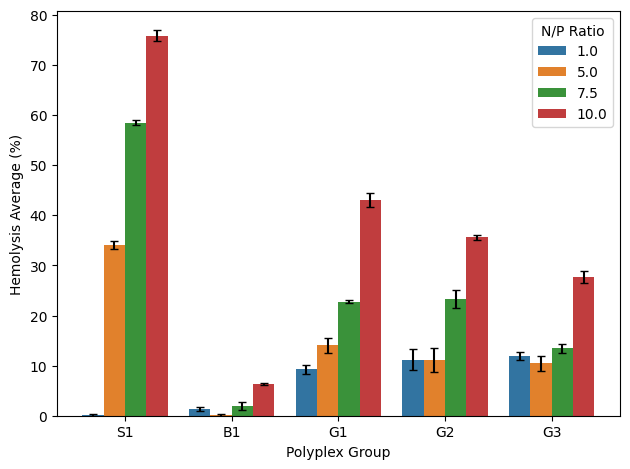

In [ ]:
# plotting bars using seaborn's barplot
bar_plot = sns.barplot(data=df, x='polyplex', y='hemolysis avg', hue='N/P ratio', dodge=True)

# current axis
ax = plt.gca()

# unique categories in 'polyplex' and 'N/P ratio'
num_polyplex = len(df['polyplex'].unique())
num_ratios = len(df['N/P ratio'].unique())

# iterate through each unique 'polyplex' category
for poly_index, polyplex in enumerate(df['polyplex'].unique()):
    # filter df for each 'polyplex' category
    poly_df = df[df['polyplex'] == polyplex]

    # iterate through each 'N/P ratio' within the 'polyplex' category
    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        # calculate x position for error bar
        # adjust position based on # of 'N/P ratios' and current index
        x = poly_index + (ratio_index - (num_ratios - 1) / 2) * 0.2  # Adjust 0.2 based on bar width

        # plot error bar
        mean_value = group_df['hemolysis avg'].mean()
        std_dev = group_df['stddev'].mean()

        # Calculate lower limit for the error bar
        lower_limit = max(mean_value - std_dev, 0)

        # Adjust the error bar length
        # If mean_value is greater than std_dev, use std_dev; otherwise, use mean_value
        error_length = mean_value - lower_limit

        plt.errorbar(x=x, y=mean_value, 
                    yerr=error_length, fmt='none', c='black', capsize=3)   


plt.ylabel('Hemolysis Average (%)')
plt.xlabel('Polyplex Group')
handles, labels = ax.get_legend_handles_labels()

# Move the legend to the top right of the plot
ax.legend(title='N/P Ratio', loc='upper right', ncol=1)

plt.tight_layout()
plt.show()


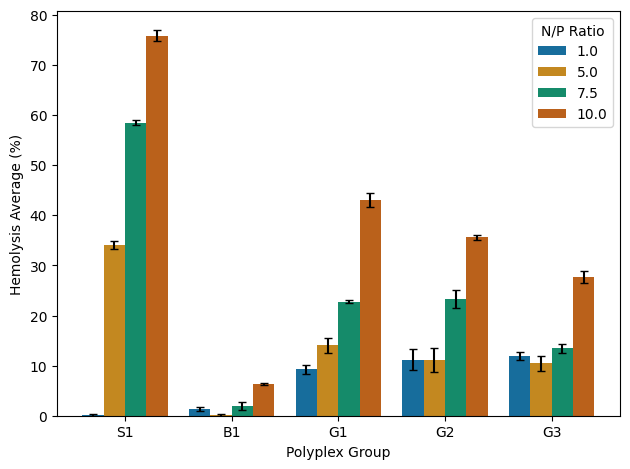

In [ ]:
# Generate a color palette for the 'N/P ratio' column if it's discrete
unique_ratios = df['N/P ratio'].unique()
num_ratios = len(unique_ratios)
colors = sns.color_palette("colorblind", num_ratios)

# Map each 'N/P ratio' to a color
np_ratio_to_color = dict(zip(unique_ratios, colors))

# Plotting bars using seaborn's barplot with specified colors
bar_plot = sns.barplot(data=df, x='polyplex', y='hemolysis avg', hue='N/P ratio', dodge=True, 
                       palette=np_ratio_to_color)

# Current axis
ax = plt.gca()

# Unique categories in 'polyplex' and 'N/P ratio'
num_polyplex = len(df['polyplex'].unique())
num_ratios = len(df['N/P ratio'].unique())

# Iterate through each unique 'polyplex' category
for poly_index, polyplex in enumerate(df['polyplex'].unique()):
    # Filter df for each 'polyplex' category
    poly_df = df[df['polyplex'] == polyplex]

    # Iterate through each 'N/P ratio' within the 'polyplex' category
    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        # Calculate x position for error bar
        x = poly_index + (ratio_index - (num_ratios - 1) / 2) * 0.2  # Adjust 0.2 based on bar width

        # Plot error bar
        mean_value = group_df['hemolysis avg'].mean()
        std_dev = group_df['stddev'].mean()

        # Calculate lower limit for the error bar
        lower_limit = max(mean_value - std_dev, 0)

        # Adjust the error bar length
        error_length = mean_value - lower_limit

        plt.errorbar(x=x, y=mean_value, 
                     yerr=error_length, fmt='none', c='black', capsize=3)   

plt.ylabel('Hemolysis Average (%)')
plt.xlabel('Polyplex Group')

# Adjusting legend with custom handles
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='N/P Ratio', loc='upper right', ncol=1)

plt.tight_layout()
plt.show()
